Радиоактивные вещества А и В излучают пуассоновские потоки частиц интенсивности $\lambda_А$  сек$^{-1}$ и $\lambda_B$  сек$^{-1}$,  $\lambda_А \neq \lambda_B$. В закрытой капсуле находится одно из этих веществ, но неизвестно, какое именно.
1. Определить необходимое время Т наблюдения излучения и статистическую процедуру (Неймана - Пирсона) определения вещества в капсуле. Процедура должна иметь заданные вероятности $\alpha, \beta$ ошибок первого и второго рода. Смоделировать измерения для двух случаев вещества (А и В), применить к ним процедуру и выяснить, верные ли решения принимаются.
2. Построить последовательную процедуру определения вещества. Определить среднее время наблюдения и функцию мощности как функцию параметра. Смоделировать процесс наблюдения и принятия решения в двух случаях (по одной реализации). Изобразить его графически.


### 1. Процедура Неймана-Пирсона

Область принятия гипотезы $ H_A $ : $ \Gamma_0 = \left\{ x : \sum\limits_{i=1}^{1396} x_i < 251 \right\}  $. **Решающая процедура**: если $ S_n = \sum\limits_{i=1}^{1396} x_i < 251 $, то принимается $ H_A $ (в капсуле вещество $ A $), иначе ~--- $ H_B $ (в капсуле вещество $ B $).

Смоделируем измерения объема n = 1396 для двух случаев веществ (A и B) и применим к
ним решающую процедуру (посмотрим на результат суммирования наблюдений).

In [1]:
from scipy.stats import poisson

In [7]:
A = poisson.rvs(mu = 0.16, size = 1396)
B = poisson.rvs(mu = 0.2, size = 1396)

In [8]:
print('A : ', A[:30])
print('B : ', B[:30])
print('sumA = ', sum(A))
print('sumB = ', sum(B))

A :  [1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0]
B :  [0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1]
sumA =  237
sumB =  288


Если $\sum\limits_{i=1}^{1396} x_i \geq 251$, то принимается $H_B$; в противном случае принимается $H_A$ (исходя из решающего правила, построенного аналитически)

### 2. ПКОВ

In [1]:
from scipy.stats import poisson
import matplotlib.pyplot as plt
import numpy as np
from pylab import rcParams

In [13]:
A = poisson.rvs(mu = 0.16, size = 1000)
B = poisson.rvs(mu = 0.2, size = 1000)

Если оба неравенства $ -13.44 < \sum\limits_{i=1}^n x_i - 0.18 n < 15.75 $ верны, то наблюдения **продолжаются** до момента нарушения хотя бы одного из неравенств (критерий окончания построен аналитически)

In [5]:
def PKOV(S):
    res = [0]
    for n in range(1, len(S)):
        tmp = sum(S[:n]) - 0.18 * n
        if -13.44 < tmp < 15.75:
            res.append(tmp)
        else:
            res.append(tmp)
            break
    return res

In [3]:
rcParams['figure.figsize'] = 10, 6

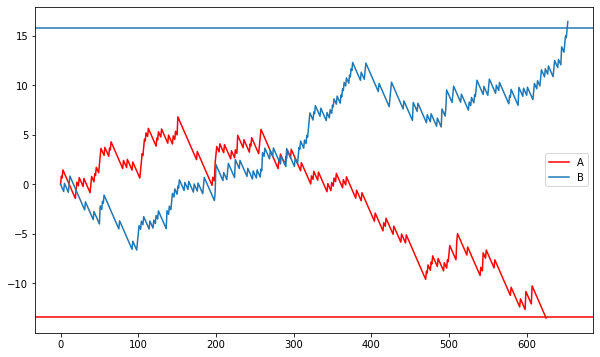

In [14]:
plt.axhline(y = -13.44, xmin = 0., xmax = 900, color = 'red')
plt.axhline(y = 15.75, xmin = 0., xmax = 900)

plt.plot(PKOV(A), label = 'A', color = 'red')
plt.plot(PKOV(B), label = 'B')

plt.legend()

plt.show()

In [15]:
print(len(PKOV(A)))
print(len(PKOV(B)))

626
654
